In [100]:
!date

Tue Oct 26 11:52:13 PDT 2021


# Connectivity assignment on reclustered glutamatergic neurons
#### Unfiltered data obtained from using kb with multimapping function. Ref genome includes WRE.

___

In [101]:
%config InlineBackend.figure_format = 'retina'
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [102]:
import sys
import anndata
# import scvi

import scanpy as sc
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import pandas as pd

sc.set_figure_params(figsize=(6, 6), frameon=False)
sc.settings.n_jobs=2

In [103]:
# set random seed
np.random.seed(926)

In [104]:
def nd(arr):
    """
    Funciton to transform numpy matrix to nd array.
    """
    return np.asarray(arr).reshape(-1)

___

# Load AnnData object

In [105]:
adata = anndata.read_h5ad("../../finchseq_data/all_leiden_hvcxra.h5ad")
adata

AnnData object with n_obs × n_vars = 2846 × 22151
    obs: 'species', 'batch', 'n_counts_processed', 'batch_index', 'n_counts_raw', 'leiden', 'celltype', 'connectivity'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'celltype_colors', 'connectivity_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

___

Plot new clustering side by side with previously assigned celltype and connectivity:

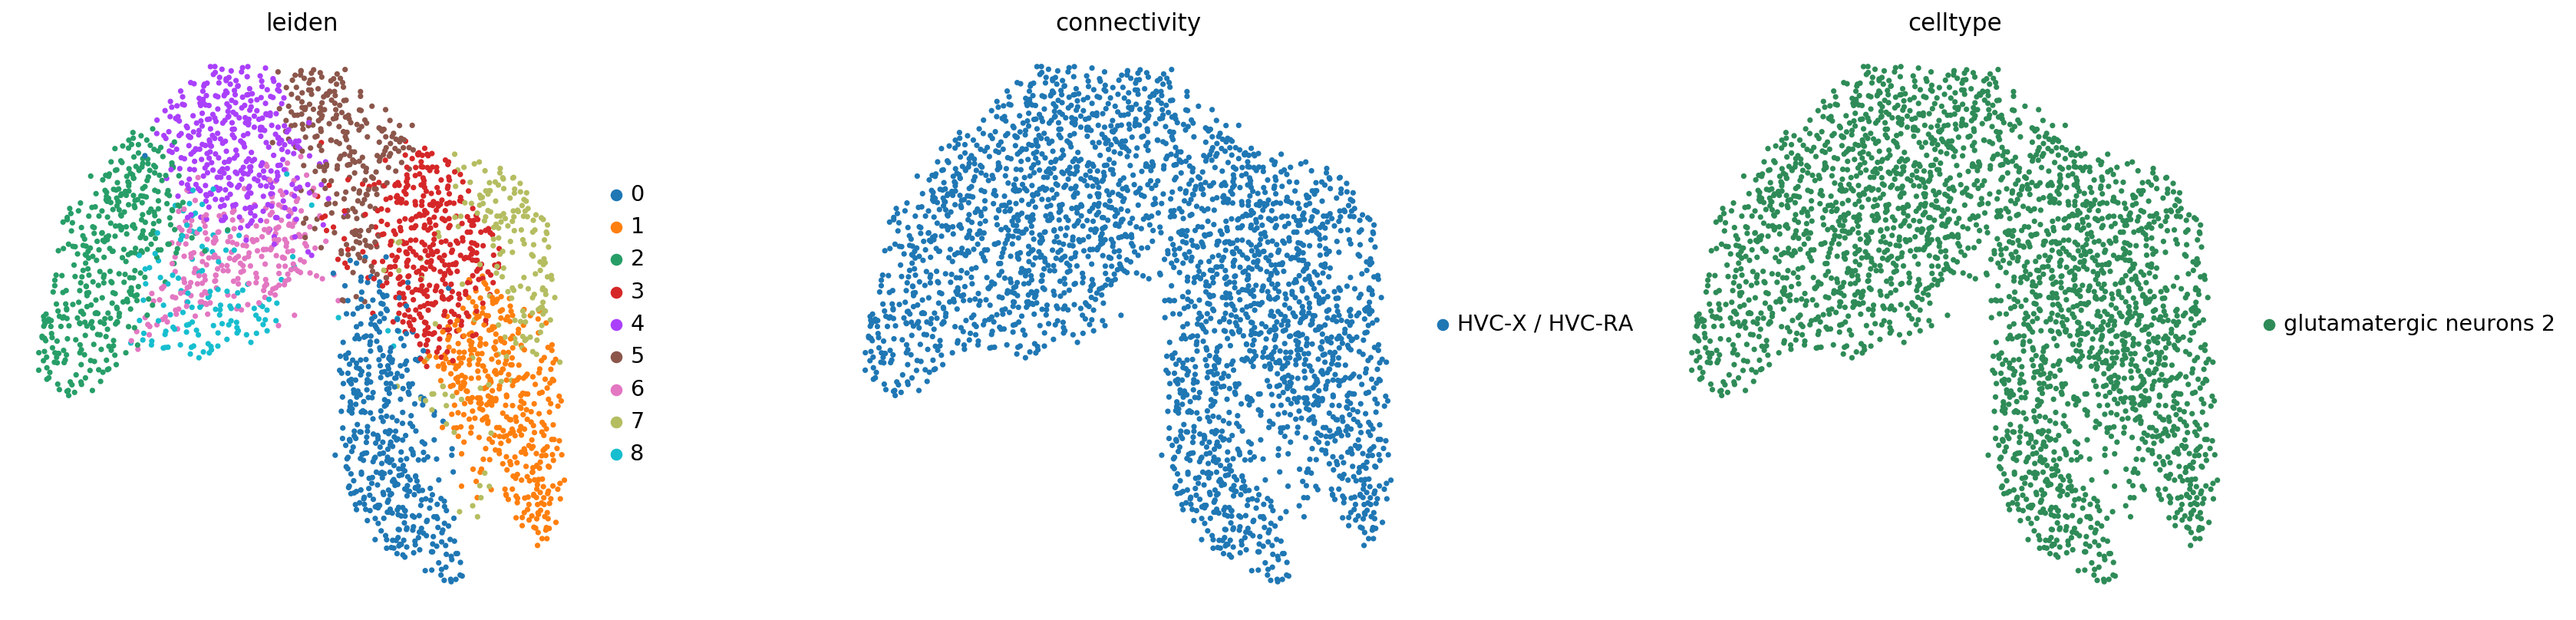

In [106]:
# Plot UMAP and color by Leiden clusters and batch
sc.pl.umap(adata, 
           color=["leiden", "connectivity", "celltype"],
           wspace=0.3
          )

___

# Find and plot DE genes

In [107]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='t-test', corr_method="bonferroni", use_raw=False)

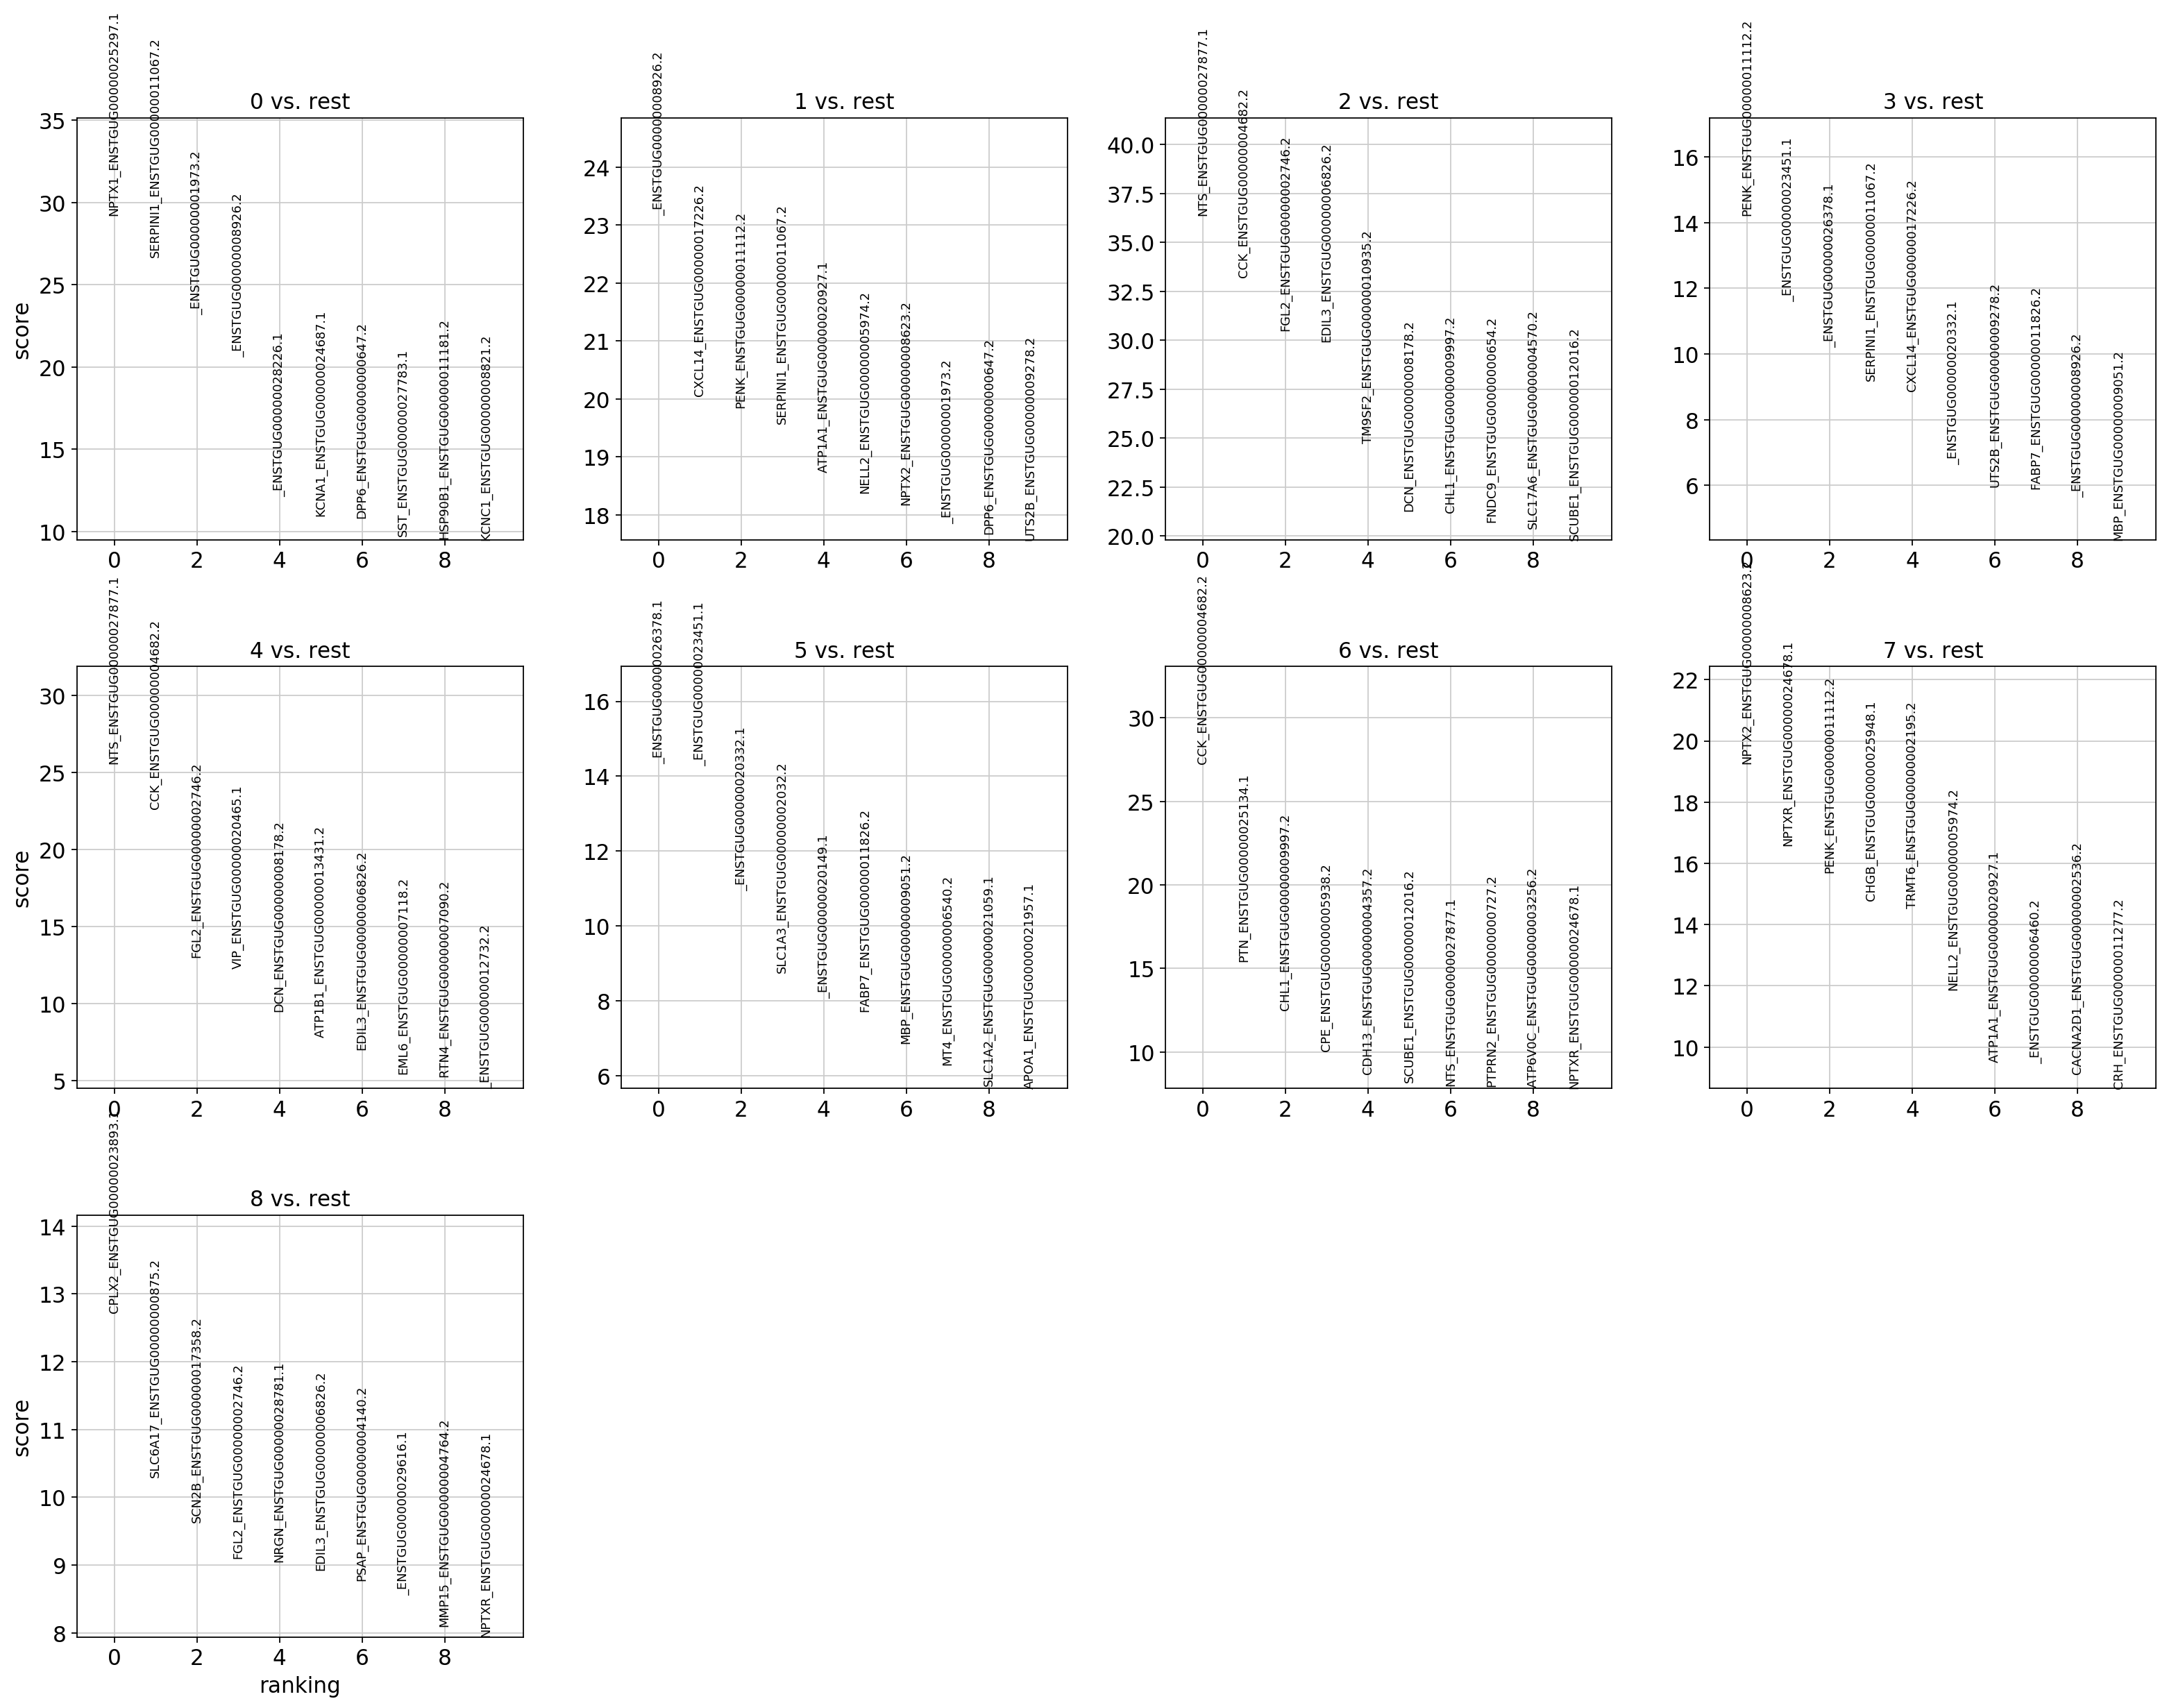

In [108]:
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False, save=False, ncols=4)

In [109]:
leiden_markers = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

___

# Load marker genes

In [110]:
marker_gene_mat = pd.read_excel('marker_genes.xlsx', sheet_name="matrix_v2")

Find gene ID for each gene:

In [111]:
marker_gene_mat["gene_name_id"] = np.arange(len(marker_gene_mat))

In [112]:
# index counter
i = 0

for gene in marker_gene_mat["Gene"].values:
    gene_name_id = []
    
    if gene.startswith("ENS"):
        gni = adata.var.iloc[np.where(adata.var.index.str.contains(gene))]
    
    else:
        gni = adata.var.iloc[np.where(adata.var.index.str.startswith(gene))]

    if len(gni) > 0:
        gene_name_id = gni.index[0]
    else:
        gene_name_id = np.nan

    marker_gene_mat["gene_name_id"][i] = gene_name_id
    i += 1

/home/lauraluebbert/bin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/lauraluebbert/bin/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### !!! Check which/if genes were found correctly:

In [113]:
marker_gene_mat[["Gene", "gene_name_id"]]

Gene                    gene_name_id
0              SLC15A2    SLC15A2_ENSTGUG00000026244.1
1                SPEF2      SPEF2_ENSTGUG00000001981.2
2                 PLP1       PLP1_ENSTGUG00000006519.2
3                CSF1R      CSF1R_ENSTGUG00000000965.2
4                 FLI1       FLI1_ENSTGUG00000020175.1
5                 RGS5       RGS5_ENSTGUG00000019064.1
6                  LUM        LUM_ENSTGUG00000008175.2
7                 HBAD       HBAD_ENSTGUG00000004381.2
8              SLC17A6    SLC17A6_ENSTGUG00000004570.2
9                 GAD1       GAD1_ENSTGUG00000008060.2
10                GAD2       GAD2_ENSTGUG00000001148.2
11                SST_        SST_ENSTGUG00000027783.1
12               PVALB      PVALB_ENSTGUG00000010713.2
13               CALB1      CALB1_ENSTGUG00000011825.2
14               CALB2      CALB2_ENSTGUG00000005987.2
15               NR2E1      NR2E1_ENSTGUG00000012147.2
16                 DCX        DCX_ENSTGUG00000006180.2
17             NECTIN3    NECTIN3_ENSTGUG00000013600.2
18                TBR1       TBR1_ENSTGUG00000006709.2
19               FABP7      FABP7_ENSTGUG00000011826.2
20              NOTCH2     NOTCH2_ENSTGUG00000017231.2
21               UTS2B      UTS2B_ENSTGUG00000009278.2
22              HPCAL1     HPCAL1_ENSTGUG00000013044.2
23                 DCN        DCN_ENSTGUG00000008178.2
24                 NTS        NTS_ENSTGUG00000027877.1
25             ALDH1A2    ALDH1A2_ENSTGUG00000006178.2
26               FNDC9      FNDC9_ENSTGUG00000000654.2
27              COL6A3     COL6A3_ENSTGUG00000003667.2
28              NFATC1     NFATC1_ENSTGUG00000006621.2
29            ADAMTS18   ADAMTS18_ENSTGUG00000009163.2
30                 VIM        VIM_ENSTGUG00000001298.2
31                BDNF       BDNF_ENSTGUG00000004743.2
32               FOSL2      FOSL2_ENSTGUG00000024611.1
33              HOMER1     HOMER1_ENSTGUG00000003711.2
34                 ARC        ARC_ENSTGUG00000012727.2
35  ENSTGUG00000007756           _ENSTGUG00000007756.2
36                SOX4                             NaN
37             or107-1                             NaN
38              EJZER1                             NaN
39               AR46s                             NaN
40                 DDC        DDC_ENSTGUG00000007930.2
41                 DBH        DBH_ENSTGUG00000005640.2
42               CASP3      CASP3_ENSTGUG00000006682.2
43               AIFM1      AIFM1_ENSTGUG00000005167.2
44                MCU_        MCU_ENSTGUG00000004428.2
45           TNFAIP8L3  TNFAIP8L3_ENSTGUG00000028388.1
46                EGR1       EGR1_ENSTGUG00000000003.2
47                E2F1       E2F1_ENSTGUG00000028557.1
48                MCM2       MCM2_ENSTGUG00000008031.2
49                MCM3       MCM3_ENSTGUG00000013275.2
50                MCM4       MCM4_ENSTGUG00000010897.2
51                MCM5       MCM5_ENSTGUG00000010831.2
52                MCM6       MCM6_ENSTGUG00000011790.2
53                PCNA       PCNA_ENSTGUG00000004036.2
54  ENSTGUG00000021193           _ENSTGUG00000021193.1

Notes on the marker genes:  
FNDC9 is a synonym for FNTM2 (HVC-X marker).  
PDGFRA (ENSTGUG00000007756.2) not annotated.  
or107-1 is a synonym for ZF1A (neither, not even ensembl ID, can be found in ref).  

SOX4 and PDGFRA not in reference genome gtf. This is weird because Colquitt et al report using them as a markers and they use the same ref. genome.

ZF1A, EJZER1, and AR46s also not in ref gtf (not used in Colquitt paper).

In [114]:
# Drop rows with genes not found in dataset
marker_gene_mat = marker_gene_mat.dropna(axis=0)

# Drop columns of celltypes containing only 0s
marker_gene_mat = marker_gene_mat.loc[:, (marker_gene_mat != 0).any(axis=0)]
 
#Set gene_name_id as index and drop "gene" coplumn
marker_gene_mat = marker_gene_mat.set_index("gene_name_id")
marker_gene_mat = marker_gene_mat.drop("Gene", axis=1)

marker_gene_mat

neuron  glia  vascular  astrocytes  \
gene_name_id                                                         
SLC15A2_ENSTGUG00000026244.1         0     1         0           1   
SPEF2_ENSTGUG00000001981.2           0     1         0           0   
PLP1_ENSTGUG00000006519.2            0     1         0           0   
CSF1R_ENSTGUG00000000965.2           0     1         0           0   
FLI1_ENSTGUG00000020175.1            0     0         1           0   
RGS5_ENSTGUG00000019064.1            0     0         1           0   
LUM_ENSTGUG00000008175.2             0     0         0           0   
HBAD_ENSTGUG00000004381.2            0     0         1           0   
SLC17A6_ENSTGUG00000004570.2         1     0         0           0   
GAD1_ENSTGUG00000008060.2            1     0         0           0   
GAD2_ENSTGUG00000001148.2            1     0         0           0   
SST_ENSTGUG00000027783.1             1     0         0           0   
PVALB_ENSTGUG00000010713.2           1     0         0           0   
CALB1_ENSTGUG00000011825.2           1     0         0           0   
CALB2_ENSTGUG00000005987.2           1     0         0           0   
NR2E1_ENSTGUG00000012147.2           1     0         0           0   
DCX_ENSTGUG00000006180.2             1     0         0           0   
NECTIN3_ENSTGUG00000013600.2         1     0         0           0   
TBR1_ENSTGUG00000006709.2            1     0         0           0   
FABP7_ENSTGUG00000011826.2           1     0         0           0   
NOTCH2_ENSTGUG00000017231.2          1     0         0           0   
UTS2B_ENSTGUG00000009278.2           1     0         0           0   
HPCAL1_ENSTGUG00000013044.2          1     0         0           0   
DCN_ENSTGUG00000008178.2             1     0         0           0   
NTS_ENSTGUG00000027877.1             1     0         0           0   
ALDH1A2_ENSTGUG00000006178.2         1     0         0           0   
FNDC9_ENSTGUG00000000654.2           1     0         0           0   
COL6A3_ENSTGUG00000003667.2          1     0         0           0   
NFATC1_ENSTGUG00000006621.2          1     0         0           0   
ADAMTS18_ENSTGUG00000009163.2        1     0         0           0   
VIM_ENSTGUG00000001298.2             0     1         0           0   
BDNF_ENSTGUG00000004743.2            0     0         0           0   
FOSL2_ENSTGUG00000024611.1           0     0         0           0   
HOMER1_ENSTGUG00000003711.2          0     0         0           0   
ARC_ENSTGUG00000012727.2             0     0         0           0   
_ENSTGUG00000007756.2                0     1         0           0   
DDC_ENSTGUG00000007930.2             1     0         0           0   
DBH_ENSTGUG00000005640.2             1     0         0           0   
CASP3_ENSTGUG00000006682.2           0     0         0           0   
AIFM1_ENSTGUG00000005167.2           0     0         0           0   
MCU_ENSTGUG00000004428.2             0     0         0           0   
TNFAIP8L3_ENSTGUG00000028388.1       0     0         0           0   
EGR1_ENSTGUG00000000003.2            0     0         0           0   
E2F1_ENSTGUG00000028557.1            0     0         0           0   
MCM2_ENSTGUG00000008031.2            0     0         0           0   
MCM3_ENSTGUG00000013275.2            0     0         0           0   
MCM4_ENSTGUG00000010897.2            0     0         0           0   
MCM5_ENSTGUG00000010831.2            0     0         0           0   
MCM6_ENSTGUG00000011790.2            0     0         0           0   
PCNA_ENSTGUG00000004036.2            0     0         0           0   
_ENSTGUG00000021193.1                0     0         0           0   

                                ependymal cells  oligodendrocytes  \
gene_name_id                                                        
SLC15A2_ENSTGUG00000026244.1                  0                 0   
SPEF2_ENSTGUG00000001981.2                    1                 0   
PLP1_ENSTGUG00000006519.2                    

___

# Marker gene expression in new clusters

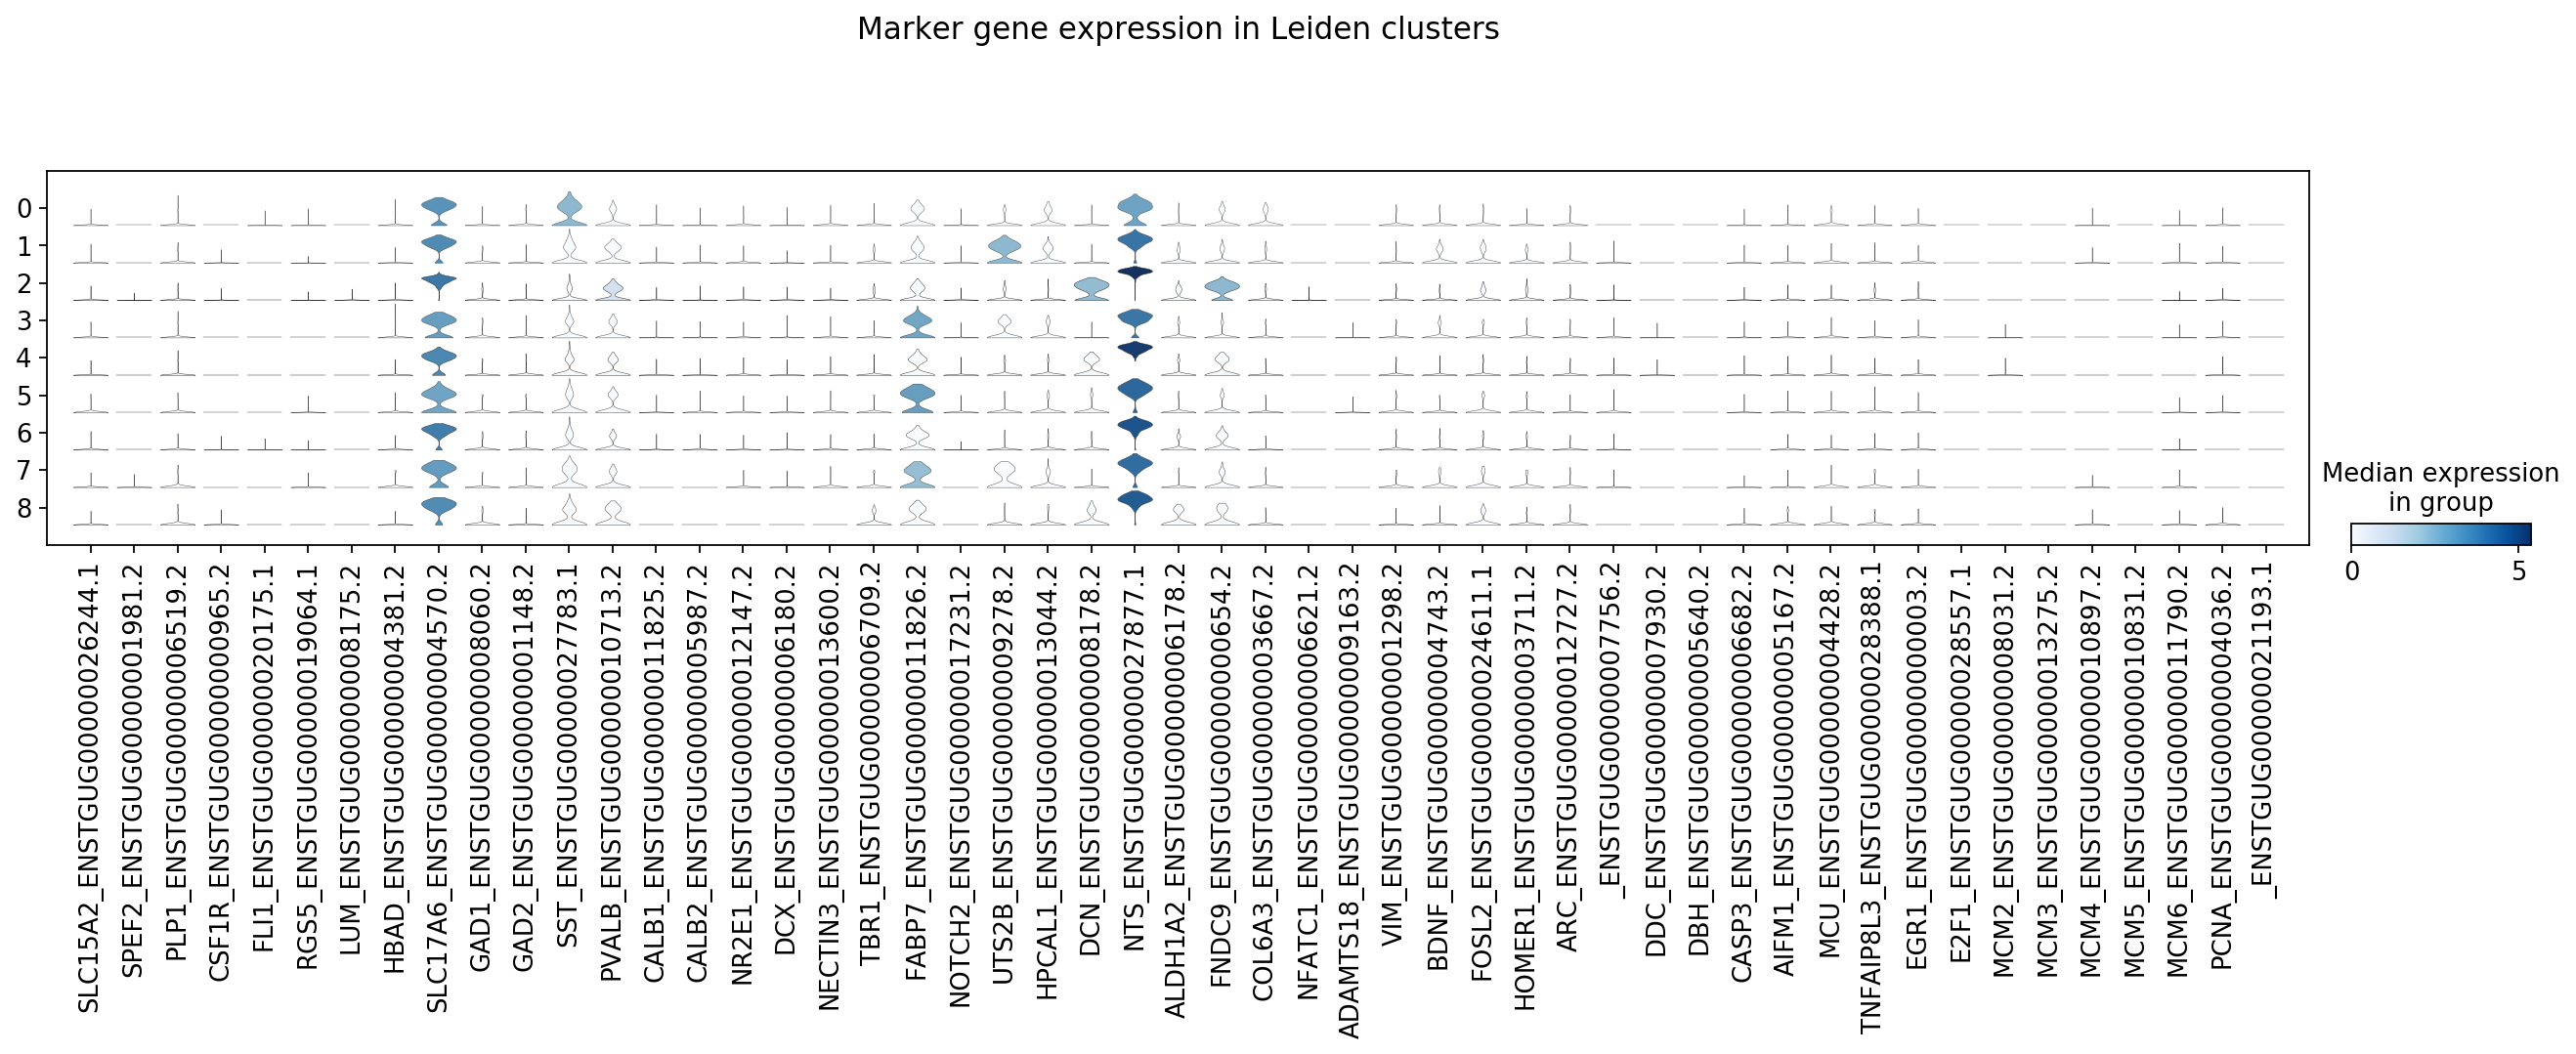

In [115]:
sc.pl.stacked_violin(adata, 
                     marker_gene_mat.index.values, 
                     groupby='leiden', 
                     title="Marker gene expression in Leiden clusters", 
                     rotation=90, 
                     sharey=True,
                     use_raw=False
                    )

___

# Assign connectivity (HVC-X / HVC-RA)

In [116]:
# Drop categories that I do not need for this analysis
conn_mat = marker_gene_mat.filter(["HVC-RA", "HVC-X"], axis=1)
# Drop rows of genes containing only 0s
conn_mat = conn_mat.loc[(conn_mat!=0).any(axis=1)]
conn_mat

HVC-RA  HVC-X
gene_name_id                               
UTS2B_ENSTGUG00000009278.2         1      0
HPCAL1_ENSTGUG00000013044.2        1      0
DCN_ENSTGUG00000008178.2           0      1
NTS_ENSTGUG00000027877.1           0      1
ALDH1A2_ENSTGUG00000006178.2       0      1
FNDC9_ENSTGUG00000000654.2         0      1

In [117]:
# Find indices of all marker genes in adata
ens_idx = np.isin(adata.var_names, conn_mat.index.values)

# Slice adata based on these indices
adata_conn = adata[:,ens_idx].copy()

adata_conn

AnnData object with n_obs × n_vars = 2846 × 6
    obs: 'species', 'batch', 'n_counts_processed', 'batch_index', 'n_counts_raw', 'leiden', 'celltype', 'connectivity'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'celltype_colors', 'connectivity_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [118]:
sc.tl.rank_genes_groups(adata_conn, groupby='leiden', method='t-test', corr_method="bonferroni", use_raw=False)

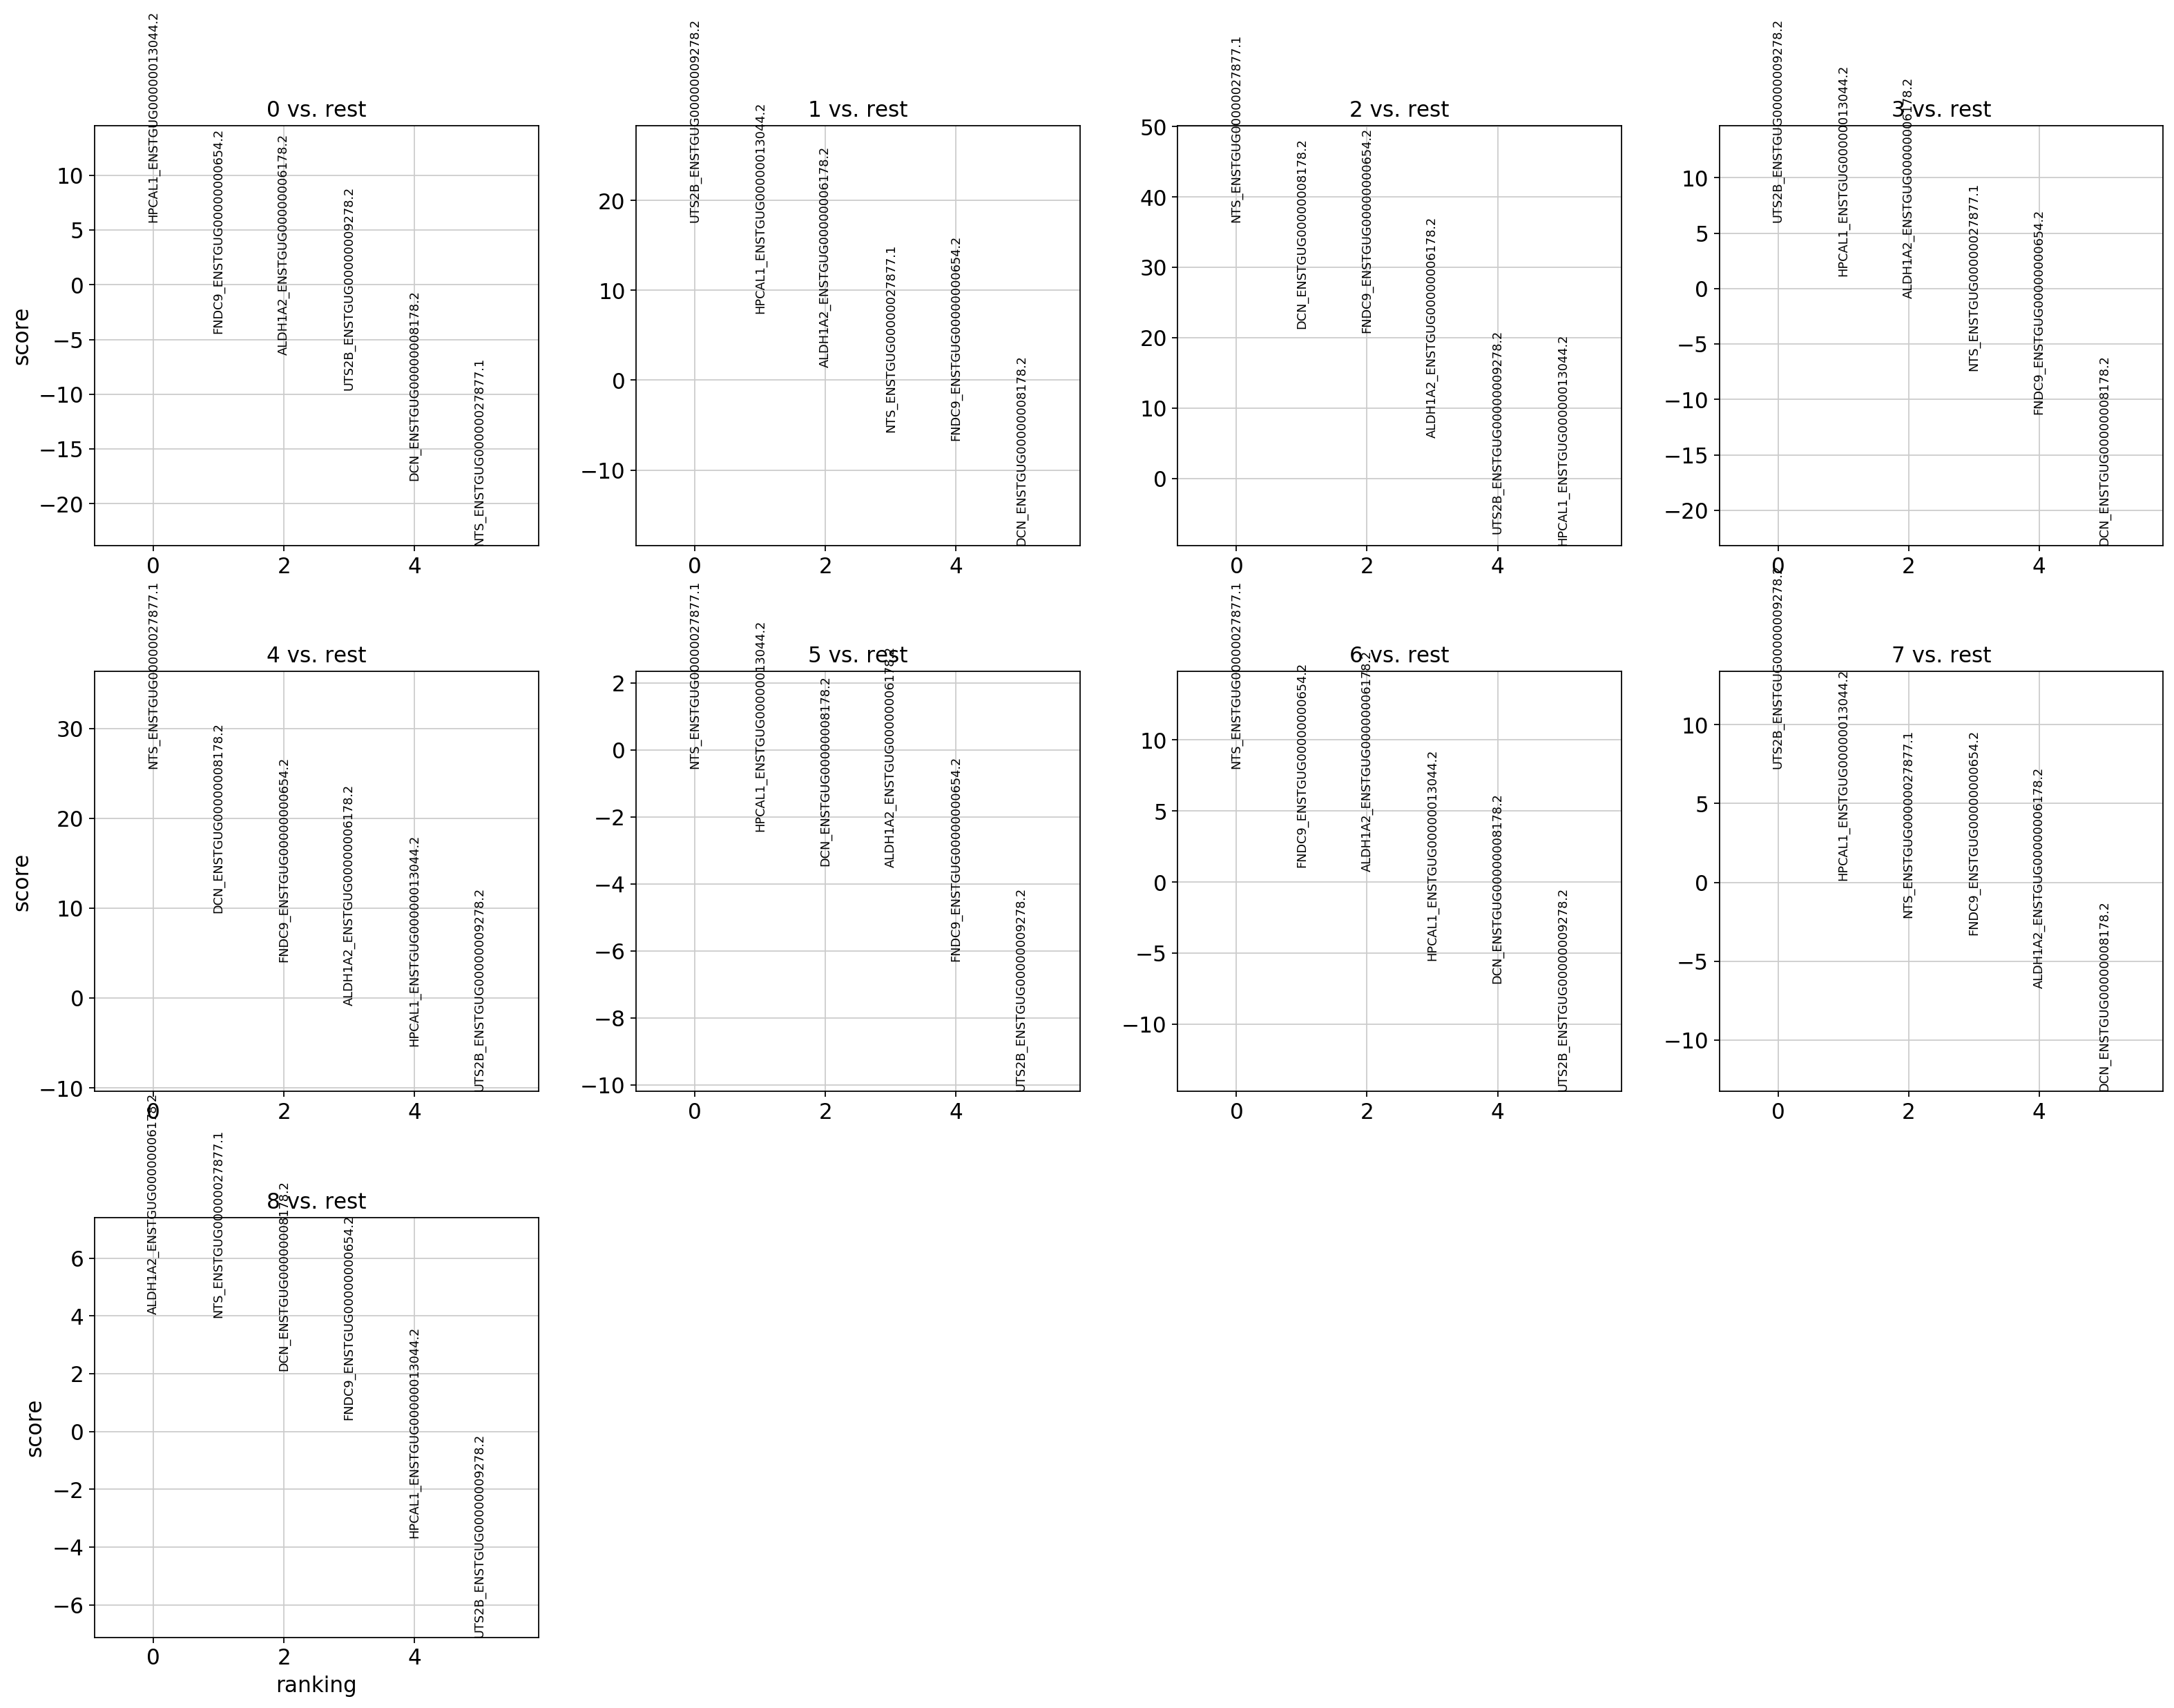

In [119]:
sc.pl.rank_genes_groups(adata_conn, n_genes=6, sharey=False, save=False, ncols=4)

In [120]:
df = pd.DataFrame()
df["cluster"] = np.arange(9)
df["connectivity"] = [
    "undefined",
    "HVC-RA 1",
    "HVC-X 1",
    "HVC-RA 2",
    "HVC-X 2",
    "HVC-X 3",
    "HVC-X 4",
    "HVC-RA 3",
    "HVC-X 5",
]
df

cluster connectivity
0        0    undefined
1        1     HVC-RA 1
2        2      HVC-X 1
3        3     HVC-RA 2
4        4      HVC-X 2
5        5      HVC-X 3
6        6      HVC-X 4
7        7     HVC-RA 3
8        8      HVC-X 5

In [121]:
# Create copy of leiden cluster column to store new connectivity assignment
adata.obs["connectivity_v2"] = adata.obs.leiden.copy()
adata.rename_categories("connectivity_v2", df["connectivity"].values)

In [122]:
# Sort df by connectivity labels
df = df.sort_values("connectivity")

In [123]:
# Desired order of the connectivity clusters
conn_clusters = df["connectivity"].values

# Reordering connectivity labels using categorical data type
adata.obs["connectivity_v2"] = adata.obs["connectivity_v2"].cat.reorder_categories(list(conn_clusters))

In [124]:
palette = [
    "purple",
    "mediumvioletred",
    "pink",
    "darkblue",
    "cornflowerblue",
    "lightskyblue",
    "royalblue",
    "lightseagreen",
    "orange"
]

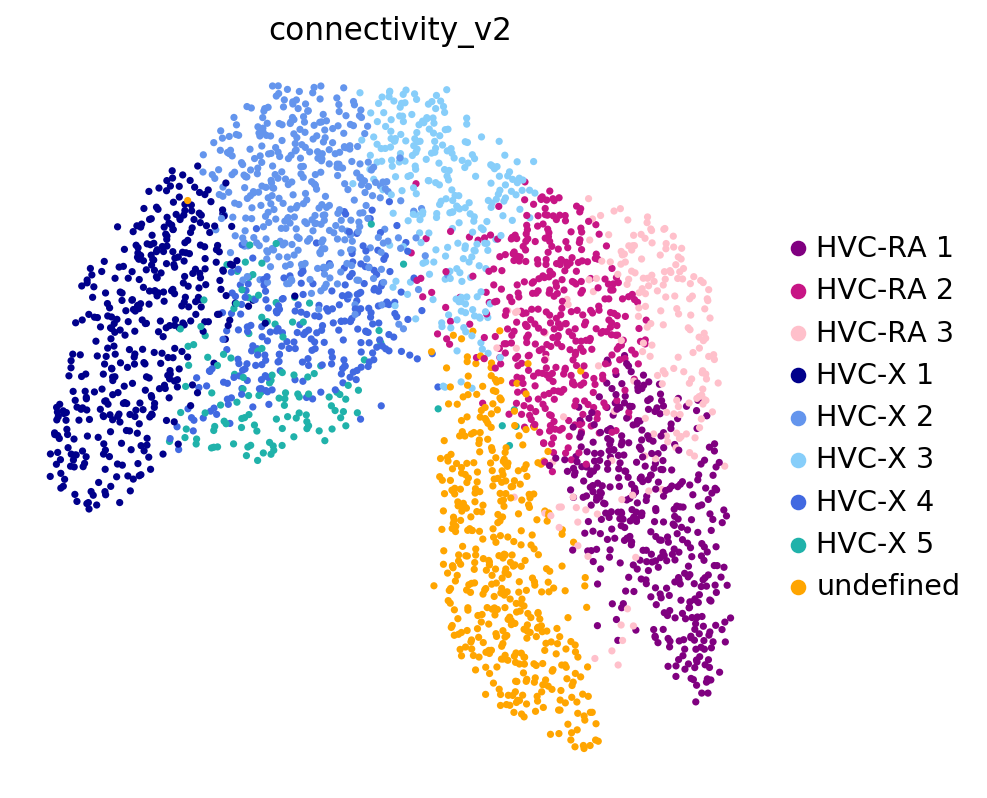

In [125]:
# Plot UMAP and color by Leiden clusters and batch
sc.pl.umap(adata, 
           color=["connectivity_v2"],
           wspace=0.3,
           palette = palette
          )

In [126]:
markers = [
    "UTS2B_ENSTGUG00000009278.2",
    "HPCAL1_ENSTGUG00000013044.2",
    "ALDH1A2_ENSTGUG00000006178.2",
    "DCN_ENSTGUG00000008178.2",
    "FNDC9_ENSTGUG00000000654.2",
    "NTS_ENSTGUG00000027877.1",
    "SST_ENSTGUG00000027783.1",
    "PVALB_ENSTGUG00000010713.2",
#     "CALB1_ENSTGUG00000011825.2",
#     "CALB2_ENSTGUG00000005987.2",
    "BDNF_ENSTGUG00000004743.2",
    "FOSL2_ENSTGUG00000024611.1",
    "HOMER1_ENSTGUG00000003711.2",
    "ARC_ENSTGUG00000012727.2",
    "TNFAIP8L3_ENSTGUG00000028388.1",
    "EGR1_ENSTGUG00000000003.2",
]

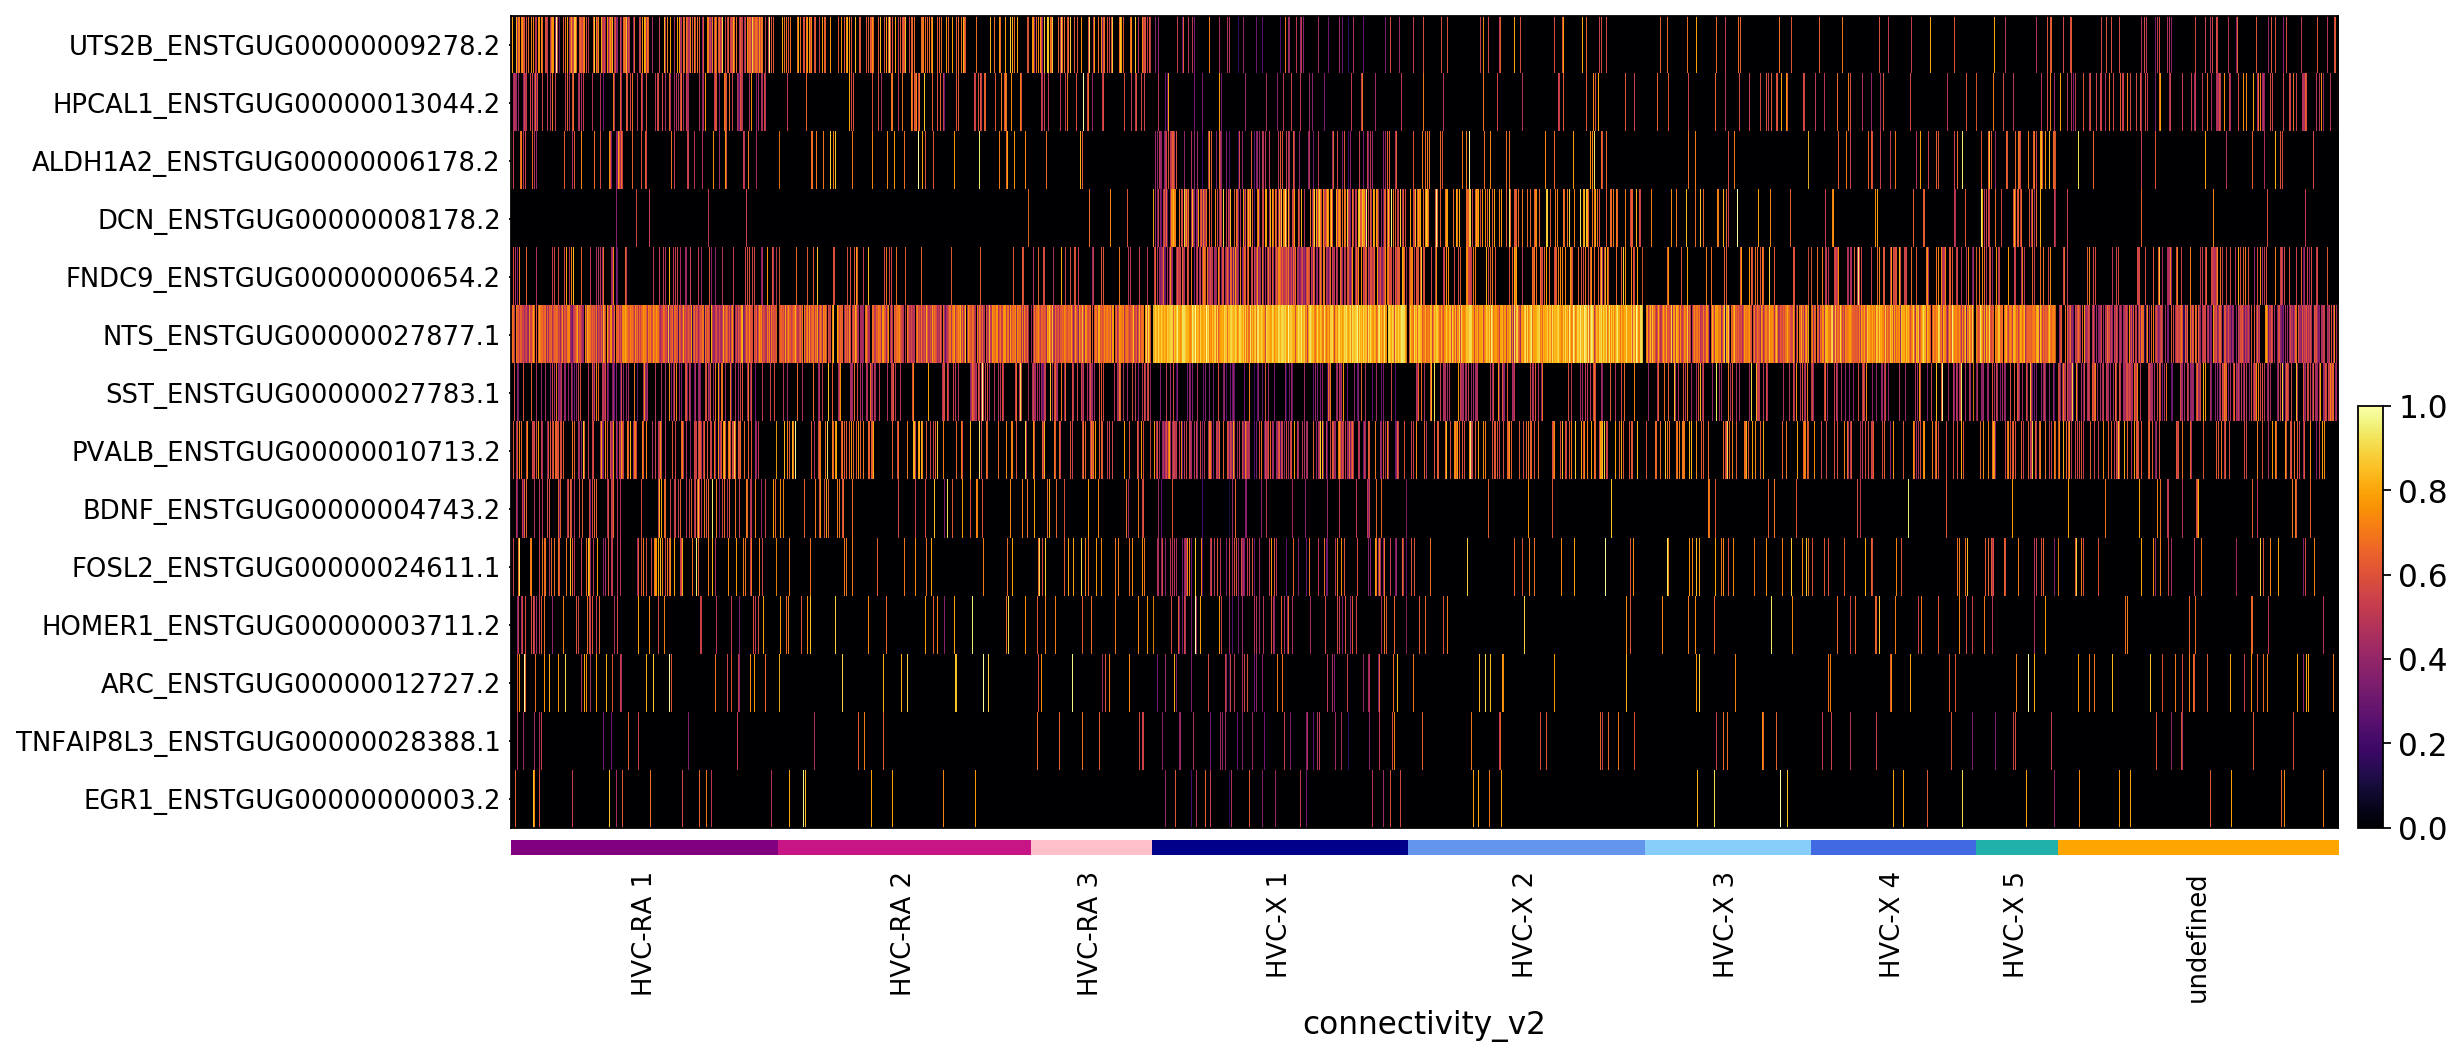

In [127]:
sc.pl.heatmap(
    adata,
    markers,
    groupby="connectivity_v2",
#     dendrogram=True, # This messes up the ordering of the celltypes
    show_gene_labels=True,
#     var_group_positions=var_groups,
#     var_group_labels=var_labels,
#     var_group_rotation=1,
    use_raw=False, # By default adata.raw.X is plotted. If use_raw=False is set, then adata.X is plotted. 
    cmap="inferno", # Alternative cmap: magma
    standard_scale="var", # standardize that dimension between 0 and 1, meaning for each variable or observation, subtract the minimum and divide each by its maximum
    swap_axes=True,
    figsize=(15, 7)
)

UTS2B (Urotensin 2B): Among its related pathways are Peptide ligand-binding receptors and Signaling by GPCR. Gene Ontology (GO) annotations related to this gene include hormone activity and G protein-coupled receptor binding.  

HPCAL1 (Hippocalcin Like 1): The protein encoded by this gene is a member of neuron-specific calcium-binding proteins family found in the retina and brain. It is highly similar to human hippocalcin protein and nearly identical to the rat and mouse hippocalcin like-1 proteins. It may be involved in the calcium-dependent regulation of rhodopsin phosphorylation and may be of relevance for neuronal signalling in the central nervous system.   

ALDH1A2 (Aldehyde Dehydrogenase 1 Family Member A2): This protein belongs to the aldehyde dehydrogenase family of proteins. The product of this gene is an enzyme that catalyzes the synthesis of retinoic acid (RA) from retinaldehyde. Retinoic acid, the active derivative of vitamin A (retinol), is a hormonal signaling molecule that functions in developing and adult tissues. The studies of a similar mouse gene suggest that this enzyme and the cytochrome CYP26A1, concurrently establish local embryonic retinoic acid levels which facilitate posterior organ development and prevent spina bifida.  

DCN (decorin): This gene encodes a member of the small leucine-rich proteoglycan family of proteins. Alternative splicing results in multiple transcript variants, at least one of which encodes a preproprotein that is proteolytically processed to generate the mature protein. This protein plays a role in collagen fibril assembly. Binding of this protein to multiple cell surface receptors mediates its role in tumor suppression, including a stimulatory effect on autophagy and inflammation and an inhibitory effect on angiogenesis and tumorigenesis.

FNDC9 (Fibronectin Type III Domain Containing 9): Fibronectin is a high-molecular weight glycoprotein of the extracellular matrix that binds to membrane-spanning receptor proteins called integrins (https://en.wikipedia.org/wiki/Fibronectin).

NTS (Neurotensin): This gene encodes a common precursor for two peptides, neuromedin N and neurotensin. Neurotensin is a secreted tridecapeptide, which is widely distributed throughout the central nervous system, and may function as a neurotransmitter or a neuromodulator. It may be involved in dopamine-associated pathophysiological events, in the maintenance of gut structure and function, and in the regulation of fat metabolism. Neurotensin also exhibits antimicrobial activity against bacteria and fungi. Tissue-specific processing may lead to the formation in some tissues of larger forms of neuromedin N and neurotensin. The large forms may represent more stable peptides that are also biologically active.

Info from GeneCards unless otherwise noted

Heatmap showing DE genes per celltype:

In [129]:
# Get first 5 DE genes for each Leiden cluster while making sure that cluster order is same as celltype order and remove duplications
l_markers = pd.unique(leiden_markers[df["cluster"].values.astype(str)].head(5).values.ravel('K')) #.ravel('K') makes sure that the values for each columns stay together instead of going per row

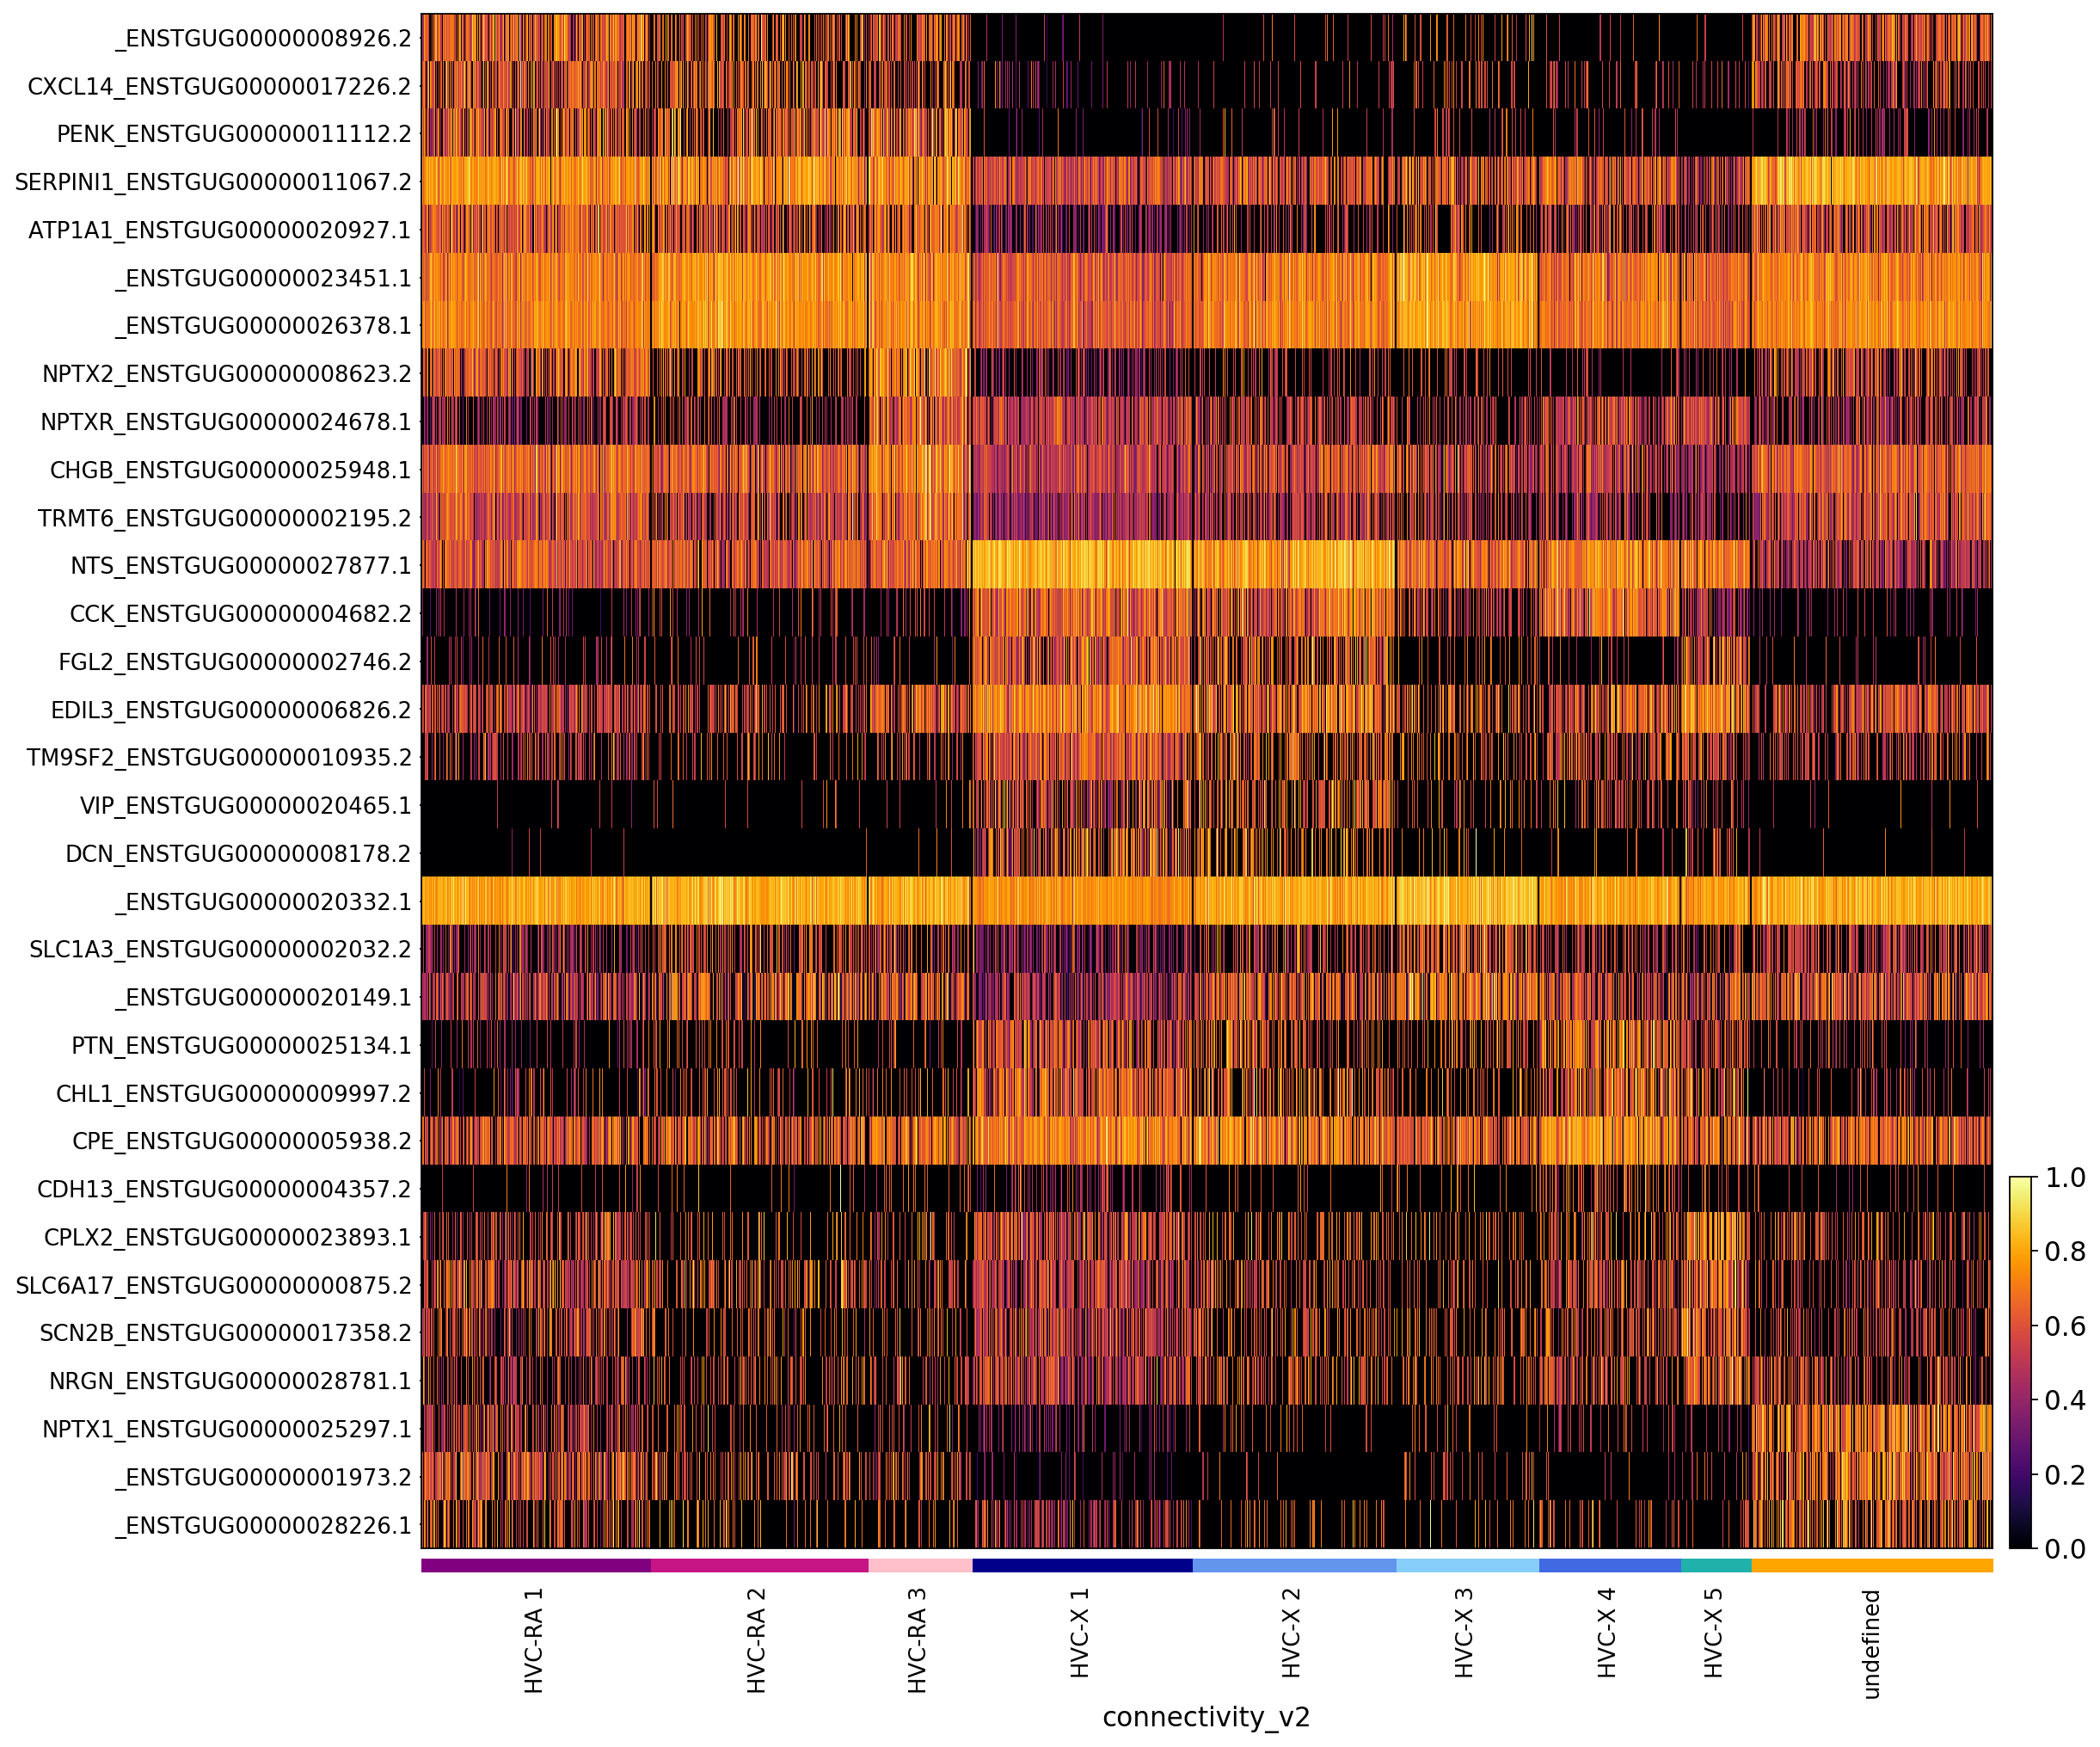

In [130]:
sc.pl.heatmap(
    adata,
    l_markers,
    groupby="connectivity_v2",
#     dendrogram=True, # This messes up the ordering of the celltypes
    show_gene_labels=True,
#     var_group_positions=var_groups,
#     var_group_labels=var_labels,
#     var_group_rotation=1,
    use_raw=False, # By default adata.raw.X is plotted. If use_raw=False is set, then adata.X is plotted. 
    cmap="inferno", # Alternative cmap: magma
    standard_scale="var", # standardize that dimension between 0 and 1, meaning for each variable or observation, subtract the minimum and divide each by its maximum
    swap_axes=True,
    figsize=(15, 15)
)

___

# Save AnnData object with connectivity assignment in newly clustered glut 2

In [ ]:
# adata.write("../../finchseq_data/all_celltype_hvcxra.h5ad")

___

# How are the "undefined" clusters different from those that could be assigned HVC-X / -RA?

The "undefined" cluster is Leiden cluster 0 in the table below:

In [131]:
# Display DE genes per cluster
leiden_markers

0                              1  \
0     NPTX1_ENSTGUG00000025297.1          _ENSTGUG00000008926.2   
1  SERPINI1_ENSTGUG00000011067.2    CXCL14_ENSTGUG00000017226.2   
2          _ENSTGUG00000001973.2      PENK_ENSTGUG00000011112.2   
3          _ENSTGUG00000008926.2  SERPINI1_ENSTGUG00000011067.2   
4          _ENSTGUG00000028226.1    ATP1A1_ENSTGUG00000020927.1   
5     KCNA1_ENSTGUG00000024687.1     NELL2_ENSTGUG00000005974.2   
6      DPP6_ENSTGUG00000000647.2     NPTX2_ENSTGUG00000008623.2   
7       SST_ENSTGUG00000027783.1          _ENSTGUG00000001973.2   
8   HSP90B1_ENSTGUG00000011181.2      DPP6_ENSTGUG00000000647.2   
9     KCNC1_ENSTGUG00000008821.2     UTS2B_ENSTGUG00000009278.2   

                              2                              3  \
0      NTS_ENSTGUG00000027877.1      PENK_ENSTGUG00000011112.2   
1      CCK_ENSTGUG00000004682.2          _ENSTGUG00000023451.1   
2     FGL2_ENSTGUG00000002746.2          _ENSTGUG00000026378.1   
3    EDIL3_ENSTGUG00000006826.2  SERPINI1_ENSTGUG00000011067.2   
4   TM9SF2_ENSTGUG00000010935.2    CXCL14_ENSTGUG00000017226.2   
5      DCN_ENSTGUG00000008178.2          _ENSTGUG00000020332.1   
6     CHL1_ENSTGUG00000009997.2     UTS2B_ENSTGUG00000009278.2   
7    FNDC9_ENSTGUG00000000654.2     FABP7_ENSTGUG00000011826.2   
8  SLC17A6_ENSTGUG00000004570.2          _ENSTGUG00000008926.2   
9   SCUBE1_ENSTGUG00000012016.2       MBP_ENSTGUG00000009051.2   

                             4                            5  \
0     NTS_ENSTGUG00000027877.1        _ENSTGUG00000026378.1   
1     CCK_ENSTGUG00000004682.2        _ENSTGUG00000023451.1   
2    FGL2_ENSTGUG00000002746.2        _ENSTGUG00000020332.1   
3     VIP_ENSTGUG00000020465.1  SLC1A3_ENSTGUG00000002032.2   
4     DCN_ENSTGUG00000008178.2        _ENSTGUG00000020149.1   
5  ATP1B1_ENSTGUG00000013431.2   FABP7_ENSTGUG00000011826.2   
6   EDIL3_ENSTGUG00000006826.2     MBP_ENSTGUG00000009051.2   
7    EML6_ENSTGUG00000007118.2     MT4_ENSTGUG00000006540.2   
8    RTN4_ENSTGUG00000007090.2  SLC1A2_ENSTGUG00000021059.1   
9        _ENSTGUG00000012732.2   APOA1_ENSTGUG00000021957.1   

                              6                              7  \
0      CCK_ENSTGUG00000004682.2     NPTX2_ENSTGUG00000008623.2   
1      PTN_ENSTGUG00000025134.1     NPTXR_ENSTGUG00000024678.1   
2     CHL1_ENSTGUG00000009997.2      PENK_ENSTGUG00000011112.2   
3      CPE_ENSTGUG00000005938.2      CHGB_ENSTGUG00000025948.1   
4    CDH13_ENSTGUG00000004357.2     TRMT6_ENSTGUG00000002195.2   
5   SCUBE1_ENSTGUG00000012016.2     NELL2_ENSTGUG00000005974.2   
6      NTS_ENSTGUG00000027877.1    ATP1A1_ENSTGUG00000020927.1   
7   PTPRN2_ENSTGUG00000000727.2          _ENSTGUG00000006460.2   
8  ATP6V0C_ENSTGUG00000003256.2  CACNA2D1_ENSTGUG00000002536.2   
9    NPTXR_ENSTGUG00000024678.1       CRH_ENSTGUG00000011277.2   

                              8  
0    CPLX2_ENSTGUG00000023893.1  
1  SLC6A17_ENSTGUG00000000875.2  
2    SCN2B_ENSTGUG00000017358.2  
3     FGL2_ENSTGUG00000002746.2  
4     NRGN_ENSTGUG00000028781.1  
5    EDIL3_ENSTGUG00000006826.2  
6     PSAP_ENSTGUG00000004140.2  
7         _ENSTGUG00000029616.1  
8    MMP15_ENSTGUG00000004764.2  
9    NPTXR_ENSTGUG00000024678.1

Check if DE genes are unique to "undefined" cluster:

In [132]:
undef_markers = leiden_markers["0"].values

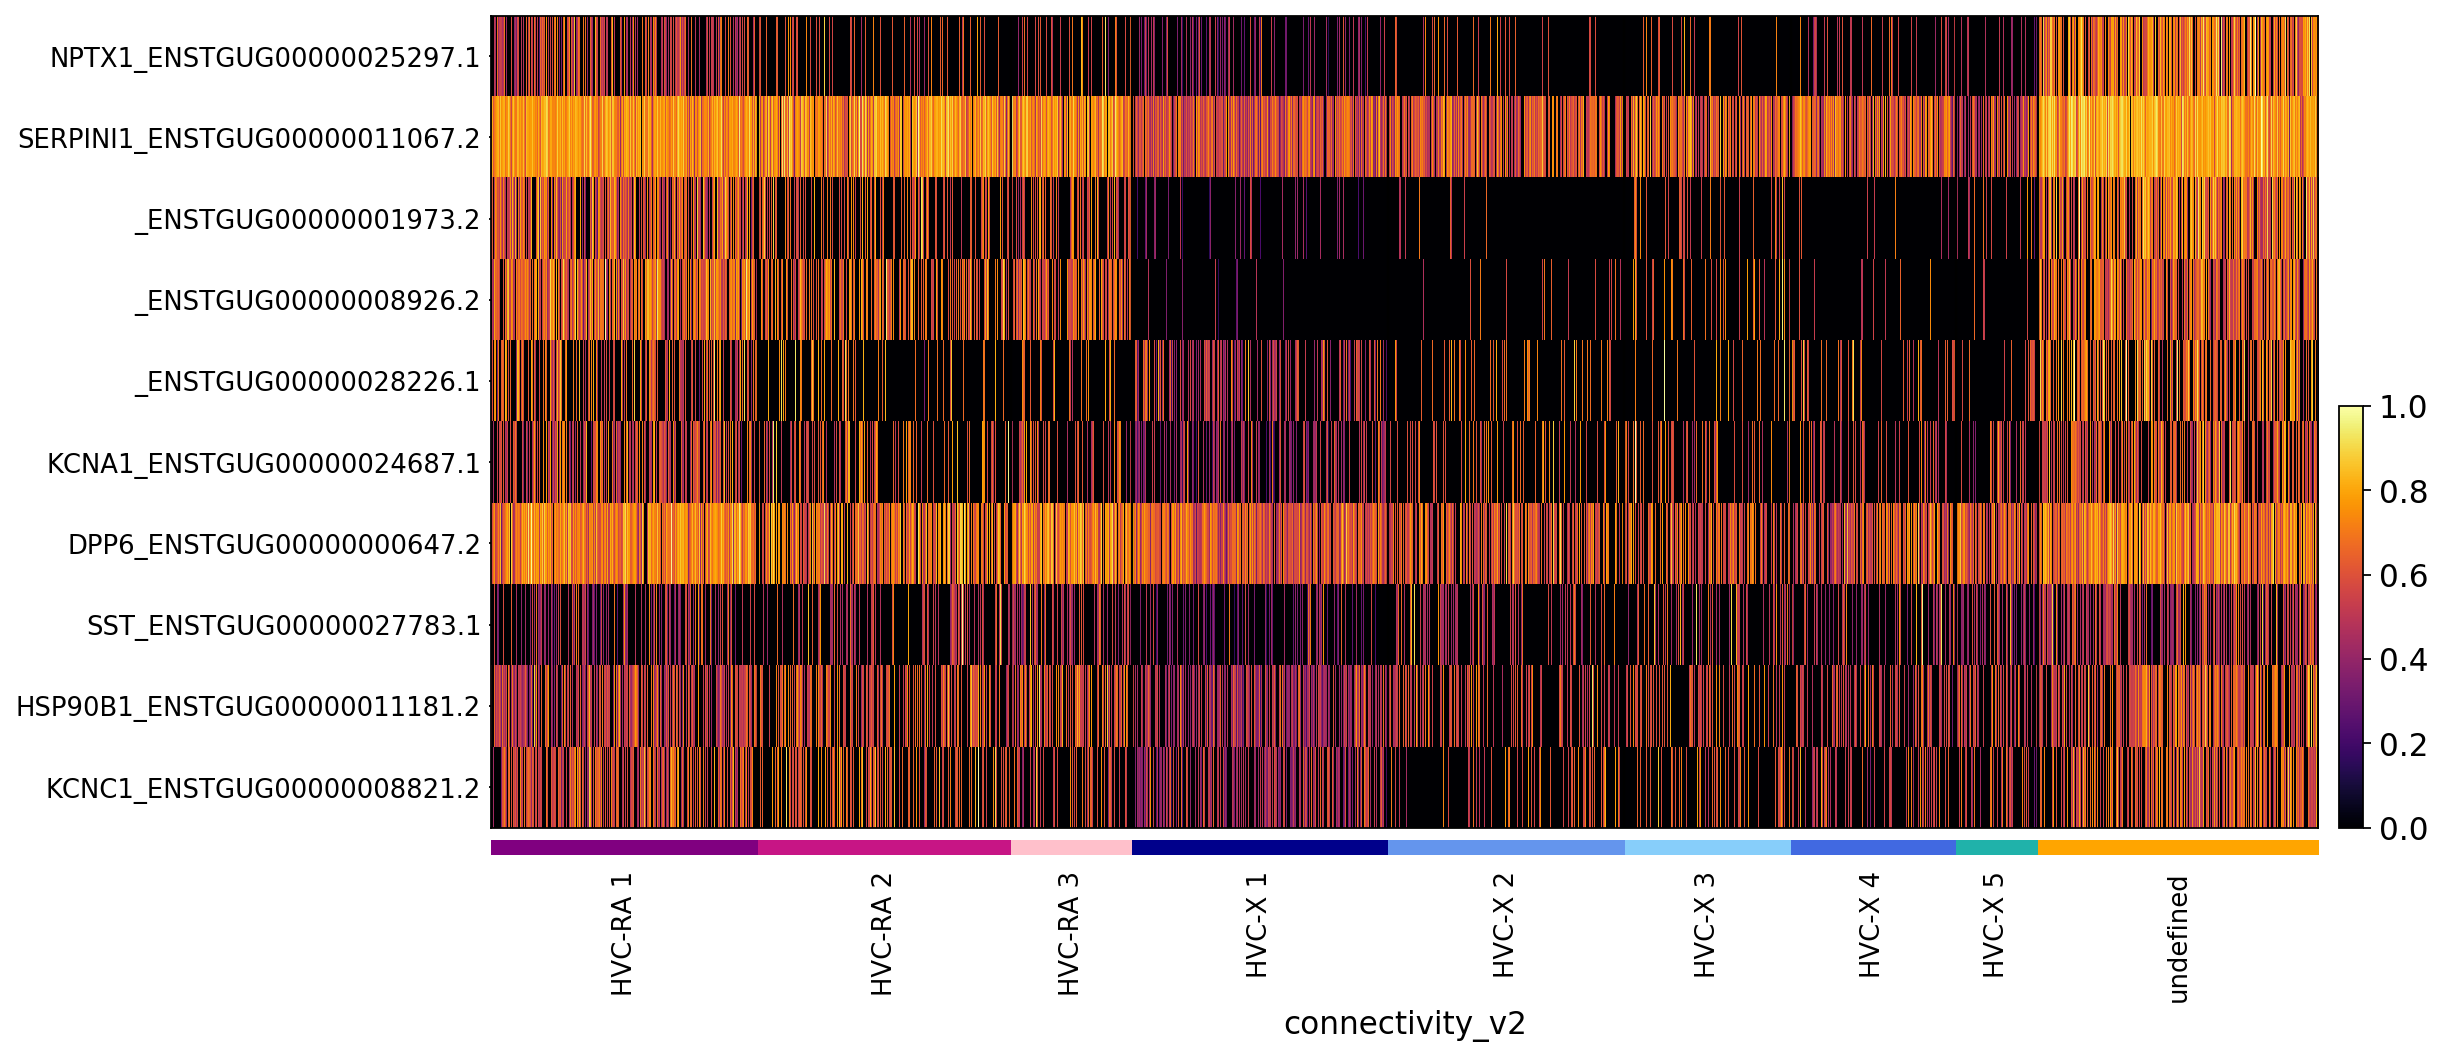

In [133]:
sc.pl.heatmap(
    adata,
    undef_markers,
    groupby="connectivity_v2",
    show_gene_labels=True,
    use_raw=False, # By default adata.raw.X is plotted. If use_raw=False is set, then adata.X is plotted. 
    cmap="inferno", # Alternative cmap: magma
    standard_scale="var", # standardize that dimension between 0 and 1, meaning for each variable or observation, subtract the minimum and divide each by its maximum
    swap_axes=True,
    figsize=(15, 7)
)

The expression of Neuronal Pentraxin 1 (NPTX1) could potentially be used as a marker for the "undefined" cluster within glutamatergic neurons. NPTX1 may be involved in mediating uptake of synaptic material during synapse remodeling or in mediating the synaptic clustering of AMPA glutamate receptors at a subset of excitatory synapses. 

It is possible that the undefined cluster is a immature HVC-RA cluster as those observed when EXP and CTRL were clustered separately.